## calculate metrics and retrieve others (matching accu, foscttm, foscknn, slt ari and etc)

plotting done together, script located out

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
sys.path.append("./")
import metrics
import utils

In [4]:
out_dir = "/ICICLE/output/"
ann_listlv1 = []
ann_listlv2 = []
foscttm_list = []
tmp = []
knn_tmp = []
slt_f1 = []
ari_f1 = []

root_dir = out_dir
# produce liger matching
lgx = pd.read_csv(root_dir+"lg/full_embed_x0.csv")
lgy = pd.read_csv(root_dir+"lg/full_embed_y0.csv")
lg_dist = utils.cdist_correlation(lgy.to_numpy(), lgx.to_numpy())
lg_full_match, lg_scores = metrics.get_knn_matching(lg_dist)
lgmatch = [lg_full_match,np.arange(lgy.shape[0]),lg_scores]
# harmony matching
hmx = pd.read_csv(root_dir+"hm/full_embed_x0.csv")
hmy = pd.read_csv(root_dir+"hm/full_embed_y0.csv")
hm_dist = utils.cdist_correlation(hmy.to_numpy(), hmx.to_numpy())
hm_full_match, hm_scores = metrics.get_knn_matching(hm_dist)
hmmatch = [hm_full_match,np.arange(hmy.shape[0]),hm_scores]
# bsc matching
bscx = pd.read_csv(root_dir+"bsc/full_embed_x0.csv")
bscy = pd.read_csv(root_dir+"bsc/full_embed_y0.csv")
bsc_dist = utils.cdist_correlation(bscy.to_numpy(), bscx.to_numpy())
bsc_full_match, bsc_scores = metrics.get_knn_matching(bsc_dist)
bscmatch = [bsc_full_match,np.arange(bscy.shape[0]),bsc_scores]
# load mf matching
mf = pd.read_csv(root_dir+"mf/full_idx.csv")
mfmatch = [mf['idx1'].tolist(),mf['idx2'].tolist(),mf['score'].tolist()]
# load sr matching
#sr = pd.read_csv(root_dir+"sr/full_idx.csv")
#srmatch = [sr['idx1'].tolist(),sr['idx2'].tolist(),sr['score'].tolist()]
srx = pd.read_csv(root_dir+"sr/full_embed_x0.csv")
sry = pd.read_csv(root_dir+"sr/full_embed_y0.csv")
sr_dist = utils.cdist_correlation(sry.to_numpy(), srx.to_numpy())
sr_full_match, sr_scores = metrics.get_knn_matching(sr_dist)
srmatch = [sr_full_match,np.arange(sry.shape[0]),sr_scores]
# load embedding too
# mf embed
mfx = pd.read_csv(root_dir+"mf/full_embed_x0.csv")
mfy = pd.read_csv(root_dir+"mf/full_embed_y0.csv")
# sr embed
srx = pd.read_csv(root_dir+"sr/full_embed_x0.csv")
sry = pd.read_csv(root_dir+"sr/full_embed_y0.csv")
# read meta info
temp_dir = '/ICICLE/data/'
meta = pd.read_csv(temp_dir + 'atac_meta.csv')
annotationlv1 = meta['human_ann'].to_numpy()

metalg = pd.read_csv(temp_dir + 'atac_meta_lgdrop.csv')
annotationlv1_lg = metalg['human_ann'].to_numpy()

order = (2, 1)
acc_ann_hm = metrics.get_matching_acc(
        matching=hmmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_lg = metrics.get_matching_acc(
        matching=lgmatch, 
        labels1=annotationlv1_lg, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_sr = metrics.get_matching_acc(
        matching=srmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_mf = metrics.get_matching_acc(
        matching=mfmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_bsc = metrics.get_matching_acc(
        matching=bscmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )
ann_listlv1.extend([acc_ann_mf, acc_ann_sr, acc_ann_lg, acc_ann_hm, acc_ann_bsc])

In [5]:
ann_listlv1

[0.8815824645816627,
 0.5057471264367817,
 0.3769045709703288,
 0.574311681368618,
 0.6440791232290831]

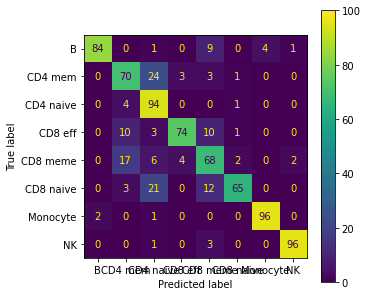

In [20]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[mfmatch[1]], annotationlv1[mfmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/fig3_ploting/plots/tea_mf.svg')

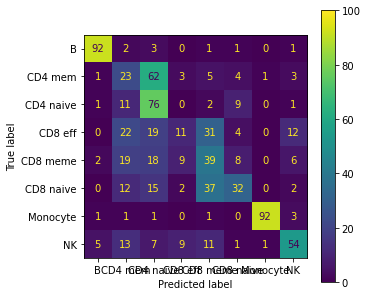

In [21]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[bscmatch[1]], annotationlv1[bscmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/fig3_ploting/plots/tea_bsc.svg')

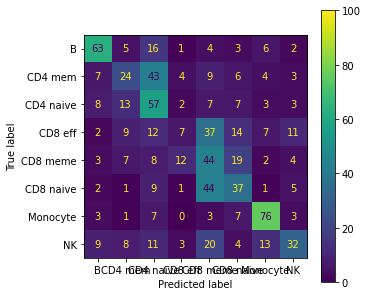

In [22]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[srmatch[1]], annotationlv1[srmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/fig3_ploting/plots/tea_sr.svg')

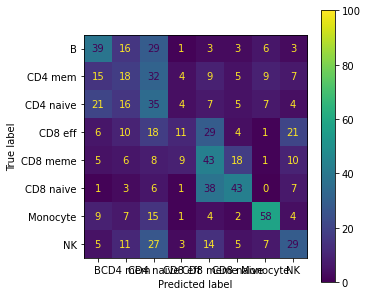

In [23]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[lgmatch[1]], annotationlv1[lgmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/fig3_ploting/plots/tea_lg.svg')

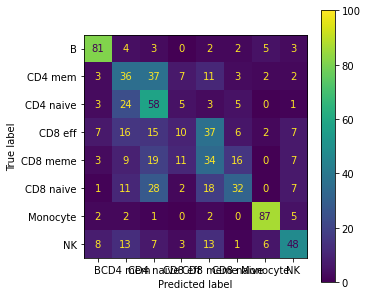

In [24]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[hmmatch[1]], annotationlv1[hmmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
#plt.savefig('/home/bkzhu/super_mario/asap/plots/cm_hm.svg')
plt.savefig('/fig3_ploting/plots/tea_hm.svg')

In [45]:
foscttm_list = []
tmp = []
knn_tmp = []
slt_f1 = []
ari_f1 = []

# foscttm
# need new dist for lg since fostccm need row aligned
lgx = pd.read_csv(root_dir+"lg/full_embed_x0.csv")
lgy = pd.read_csv(root_dir+"lg/full_embed_y0.csv")
lg_dist = utils.cdist_correlation(lgx.to_numpy(), lgy.to_numpy())
# mf
mfdist = utils.cdist_correlation(mfx.to_numpy(), mfy.to_numpy())
mf_fos = metrics.get_foscttm(mfdist)
# sr
srdist = utils.cdist_correlation(srx.to_numpy(), sry.to_numpy())
sr_fos = metrics.get_foscttm(srdist)
# lg
lg_fos = metrics.get_foscttm(lg_dist)
# hm
hm_fos = metrics.get_foscttm(hm_dist)
# bsc
bsc_fos = metrics.get_foscttm(bsc_dist)

foscttm_list.extend([mf_fos,sr_fos,lg_fos,hm_fos, bsc_fos])

In [46]:
foscttm_list

[0.1463016898580294,
 0.30415624246833584,
 0.357620959825351,
 0.2707941633206696,
 0.2743294590435025]

In [47]:

# knn search tmp
k = 100
knn_match_mf = metrics.get_knn_alignment_score(
    dist=mfdist,
    k_max=k
)
knn_match_sr = metrics.get_knn_alignment_score(
    dist=srdist,
    k_max=k
)
knn_match_lg = metrics.get_knn_alignment_score(
    dist=lg_dist,
    k_max=k
)
knn_match_hm = metrics.get_knn_alignment_score(
    dist=hm_dist,
    k_max=k
)
knn_match_bsc = metrics.get_knn_alignment_score(
    dist=bsc_dist,
    k_max=k
)
# store the knn tmp
knn_tmp.extend([knn_match_mf.tolist(), knn_match_sr.tolist(),
                knn_match_lg.tolist(), knn_match_hm.tolist(), knn_match_bsc.tolist()])
# also need to read the integration metrics
mf_met = pd.read_csv(root_dir+"mf/metrics.csv")
sr_met = pd.read_csv(root_dir+"sr/metrics.csv")
lg_met = pd.read_csv(root_dir+"lg/metrics.csv")
hm_met = pd.read_csv(root_dir+"hm/metrics.csv")
bsc_met = pd.read_csv(root_dir+"bsc/metrics.csv")

slt_f1.extend([mf_met.loc[0,'slt_f1'],sr_met.loc[0,'slt_f1'],
               lg_met.loc[0,'slt_f1'],hm_met.loc[0,'slt_f1'], bsc_met.loc[0,'slt_f1']])
ari_f1.extend([mf_met.loc[0,'ari_f1'],sr_met.loc[0,'ari_f1'],
               lg_met.loc[0,'ari_f1'],hm_met.loc[0,'ari_f1'], bsc_met.loc[0,'ari_f1']])

In [49]:
# construct batch
#b = np.array(["b1","b2","b3","b4","b5"])
#binfo = np.repeat(b, [4,4,4,4,4], axis=0)
m = ["mf","sr","lg","hm","bsc"]
minfo = m

data = {'method':minfo,'slt_f1': slt_f1, 'ari_f1':ari_f1,
       'ann1':ann_listlv1, 'foscttm':foscttm_list }

matching_result = pd.DataFrame(data)

In [50]:
matching_result

,method,slt_f1,ari_f1,ann1,foscttm
0,mf,0.537964,0.629832,0.881582,0.146302
1,sr,0.506979,0.565042,0.505747,0.304156
2,lg,0.477750,0.539169,0.376905,0.357621
3,hm,0.507922,0.573965,0.574312,0.270794
4,bsc,0.520403,0.588257,0.644079,0.274329


In [51]:
matching_result.to_csv("/home/bkzhu/super_mario/ICICLE/output/batch5_resultsV2.csv")

In [52]:
# construct batch
#b = np.array(["b1","b2","b3","b4","b5"])
#binfo = np.repeat(b,[400,400,400,400,400], axis=0).tolist()
m = np.array(["mf", "sr","lg","hm","bsc"])
minfo = np.repeat(m, [100,100,100,100,100], axis=0).tolist()
minfo2 = minfo #* 5
knn = [item for sublist in knn_tmp for item in sublist]
step = [i for i in range(100)]*5 #*5
data = {'method':minfo2,'knn_tmp': knn, 'step':step }

knn_result = pd.DataFrame(data)

In [54]:
# save the results as csvs
knn_result.to_csv("/home/bkzhu/super_mario/ICICLE/output/knntmpV2.csv")

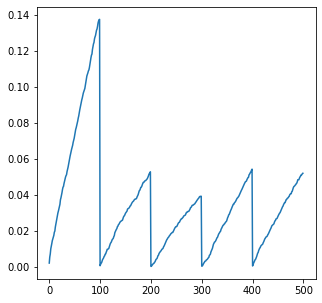

In [55]:
plt.plot(knn)